<a href="https://colab.research.google.com/github/Mu-Hasnain/CurrencyDetection/blob/main/CurrencyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from gtts import gTTS
import cv2 
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import Audio
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras import models

In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 5.8 MB 59.1 MB/s 
     |████████████████████████████████| 438 kB 70.0 MB/s 
     |████████████████████████████████| 1.6 MB 19.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [4]:
!nvidia-smi

Tue Jul 26 18:15:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.__version__

'2.8.2'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train="/content/drive/MyDrive/train"

In [8]:
test="/content/drive/MyDrive/dataset/Testdata"

In [9]:
train

'/content/drive/MyDrive/train'

In [10]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

In [11]:
TRAINING_DIR = "/content/drive/MyDrive/dataset/Traindata"
train_datagen = ImageDataGenerator(rescale=1.0/255.,shear_range=0.2,
                                       zoom_range=0.4,
                                       horizontal_flip=True, 
                                         )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=30,
                                                    class_mode='binary',
                                                    target_size=(256, 256))

Found 700 images belonging to 7 classes.


In [12]:
VALIDATION_DIR = "/content/drive/MyDrive/dataset/Testdata"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,shear_range=0.2,
                                       zoom_range=0.6,
                                       horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=30,
                                                              class_mode='binary',
                                                              target_size=(256, 256))

Found 703 images belonging to 7 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()
history = model.fit_generator(train_generator,
                              epochs=250,
                              verbose=1,
                              validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 [==============================] - ETA: 0s - loss: 4.2604 - accuracy: 0.1571 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa790ee4cb0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

In [17]:
#model.save('CNNmodel.h5')
model.save('/content/drive/MyDrive/Currency/CurrencyDetectionModel.h5')

In [18]:
import matplotlib.image  as mpimg

In [19]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [20]:
 epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

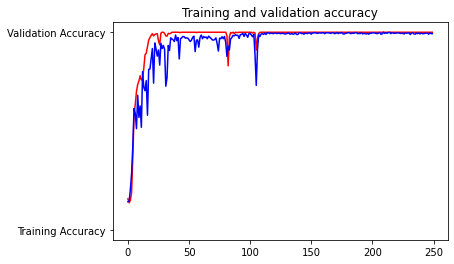

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot training and validation accuracy per epoch
# #------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

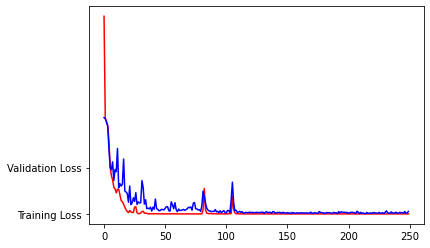

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [23]:
generator= train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Traindata', batch_size=10)
label_map = (generator.class_indices)

Found 700 images belonging to 7 classes.


In [24]:
label_map

{'10': 0, '100': 1, '1000': 2, '20': 3, '50': 4, '500': 5, '5000': 6}

In [29]:
image = keras.preprocessing.image
model = keras.models.load_model('/content/drive/MyDrive/Currency/CurrencyDetectionModel.h5')
#path to any image to be predicted
path = '/content/drive/MyDrive/train/10/10B1_0_1349.jpeg'
dim = (256,256)
img = image.load_img(path,target_size=(256,256))
#img = cv2.imread(path, cv2.IMREAD_UNCHANGED) 
#resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#img = np.array(resized,dtype='float32')/255
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#[x] can be an array of images 
#images = np.vstack([x])
#classes = model.predict_class(x)
predict = model.predict(x)
predict = np.argmax(predict,axis=1)
print(predict)
# Desired output. Charts with training and validation metrics. No crash :)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0]


In [30]:
predict

array([0])

In [31]:
if predict == 0:
  n = '10 Rupees'
  print(n)
elif predict == 1:
 n = '100 Rupees'
 print(n) 
elif predict == 2:
   n = '1000 Rupees'
   print(n)
elif predict == 3:
  n = '20 Rupees'
  print(n)
elif predict == 4:
  n = '50 Rupees'
  print(n)
elif predict == 5:
  n = '500 Rupees'
  print(n)
elif predict == 6:
  n = '5000 Rupees'
  print(n)          

10 Rupees


In [32]:
tts = gTTS(n) #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

In [33]:


import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Currency/CurrencyDetectionModel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("CurrencyDetection.tflite", "wb").write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmp2rfzl3x5/assets


118081204

In [34]:
!cp /content/CurrencyDetection.tflite /content/drive/MyDrive/Currency